In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_path = '/content/drive/My Drive/My Files/mit-bih-arrhythmia-database-1.0.0'


In [3]:
!ls '/content/drive/My Drive/My Files/mit-bih-arrhythmia-database-1.0.0'

100.atr    106.dat  113.hea  119.hea  202.atr  209.xws	217.xws  230.atr
100.dat    106.hea  113.xws  119.xws  202.dat  210.atr	219.atr  230.dat
100.hea    106.xws  114.atr  121.atr  202.hea  210.dat	219.dat  230.hea
100.xws    107.atr  114.dat  121.dat  202.xws  210.hea	219.hea  230.xws
101.atr    107.dat  114.hea  121.hea  203.at-  210.xws	219.xws  231.atr
101.dat    107.hea  114.xws  121.xws  203.at_  212.atr	220.atr  231.dat
101.hea    107.xws  115.atr  122.atr  203.atr  212.dat	220.dat  231.hea
101.xws    108.at_  115.dat  122.dat  203.dat  212.hea	220.hea  231.xws
102-0.atr  108.atr  115.hea  122.hea  203.hea  212.xws	220.xws  232.atr
102.atr    108.dat  115.xws  122.xws  203.xws  213.atr	221.atr  232.dat
102.dat    108.hea  116.atr  123.atr  205.atr  213.dat	221.dat  232.hea
102.hea    108.xws  116.dat  123.dat  205.dat  213.hea	221.hea  232.xws
102.xws    109.atr  116.hea  123.hea  205.hea  213.xws	221.xws  233.atr
103.atr    109.dat  116.xws  123.xws  205.xws  214.at_	222.at_  

In [4]:
pts = ['100', '101', '102', '103', '104', '105', '106', '107',
       '108', '109', '111', '112', '113', '114', '115', '116', 
       '117', '118', '119', '121', '122', '123', '124', '200',
       '201', '202', '203', '205', '207', '208', '209', '210',
       '212', '213', '214', '215', '217', '219', '220', '221',
       '222', '223', '228', '230', '231', '232', '233', '234']
       

In [5]:
len(pts)

48

In [6]:
pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 KB 4.1 MB/s eta 0:00:00
  Attempting uninstall: SoundFile
    Found existing installation: soundfile 0.12.1
    Uninstalling soundfile-0.12.1:
      Successfully uninstalled soundfile-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.


In [7]:
import wfdb

In [8]:
pt = '100'
file = data_path + '/' + pt
record = wfdb.rdrecord(file)
print(record.p_signal.shape)
print(record.fs)

(650000, 2)
360


In [9]:
annotation = wfdb.rdann(file, 'atr')
print(annotation.symbol)
print(annotation.sample)


['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [11]:
from pandas.core.apply import Axis
from itertools import count
from pandas.tseries.frequencies import unique
import numpy as np
import pandas as pd

sym = annotation.symbol
unique_symbol, counts = np.unique(sym, return_counts=True)
df_sub = pd.DataFrame({'symbol':unique_symbol, 'count': counts, 'patient':[pt]*len(counts)})
# df = pd.concat([df, df_sub], axis=0)


# print(df)
print(df_sub)

  symbol  count patient
0      +      1     100
1      A     33     100
2      N   2239     100
3      V      1     100


In [12]:
from posixpath import join
df = pd.DataFrame()

for pt in pts:
  file = data_path + '/' +pt
  annotation = wfdb.rdann(file, 'atr')
  sym = annotation.symbol

  unique_symbol, counts = np.unique(sym, return_counts=True)
  df_sub = pd.DataFrame({'symbol':unique_symbol, 'count': counts, 'patient':[pt]*len(counts)})
  df = pd.concat([df, df_sub], axis=0)

print(df)


   symbol  count patient
0       +      1     100
1       A     33     100
2       N   2239     100
3       V      1     100
0       +      1     101
..    ...    ...     ...
0       +      3     234
1       J     50     234
2       N   2700     234
3       V      3     234
4       ~      8     234

[283 rows x 3 columns]


In [13]:
df_symbols = df.groupby('symbol').sum()
print(df_symbols)

        count
symbol       
!         472
"         437
+        1291
/        7028
A        2546
E         106
F         803
J          83
L        8075
N       75052
Q          33
R        7259
S           2
V        7130
[           6
]           6
a         150
e          16
f         982
j         229
x         193
|         132
~         616


In [14]:
abnormal = ['L', 'R', 'B', 'A', 'a', 'J', 'S', 'Y', 'r', 'F',
            'e', 'j', 'n', 'E']
normal = ['N']

In [15]:
df['Çategory'] = -1
df.loc[df.symbol.isin(normal), 'Çategory'] = 0
df.loc[df.symbol.isin(abnormal), 'Çategory'] = 1
print(df)

   symbol  count patient  Çategory
0       +      1     100        -1
1       A     33     100         1
2       N   2239     100         0
3       V      1     100        -1
0       +      1     101        -1
..    ...    ...     ...       ...
0       +      3     234        -1
1       J     50     234         1
2       N   2700     234         0
3       V      3     234        -1
4       ~      8     234        -1

[283 rows x 4 columns]


In [16]:
df_Category = df.groupby('Çategory').sum()
print(df_Category)

          count
Çategory       
-1        18326
 0        75052
 1        19269


In [17]:
def load_ecg(file):
  record = wfdb.rdrecord(file)
  annotation = wfdb.rdann(file, 'atr')
  p_signal = record.p_signal

  assert record.fs == 360, 'Sampling freq is not 360'

  symbols = annotation.symbol
  symbol_samples = annotation.sample

  return p_signal, symbols, symbol_samples

In [18]:
file = data_path + '/' + pts[0]
p_signal, symbols, symbol_samples = load_ecg(file)
print(p_signal)
print(p_signal.shape)
print(symbols)
print(len(symbols))
print(symbol_samples)
print(len(symbol_samples))

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ...
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]
(650000, 2)
['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [19]:
values, counts = np.unique(symbols, return_counts=True)
print(values)
print(counts)

['+' 'A' 'N' 'V']
[   1   33 2239    1]


In [20]:
ab_index = [b for a, b in zip(symbols, symbol_samples) if a in abnormal]
print(ab_index)

[2044, 66792, 74986, 99579, 128085, 170719, 279576, 305709, 307745, 312825, 317785, 319223, 346804, 351481, 377081, 397335, 421994, 422818, 433841, 436149, 442623, 444705, 454651, 458168, 496712, 520982, 562812, 566259, 567379, 574429, 579448, 593068, 629171]


In [21]:
nor_index = [b for a, b in zip(symbols, symbol_samples) if a in normal]
print(ab_index)

[2044, 66792, 74986, 99579, 128085, 170719, 279576, 305709, 307745, 312825, 317785, 319223, 346804, 351481, 377081, 397335, 421994, 422818, 433841, 436149, 442623, 444705, 454651, 458168, 496712, 520982, 562812, 566259, 567379, 574429, 579448, 593068, 629171]


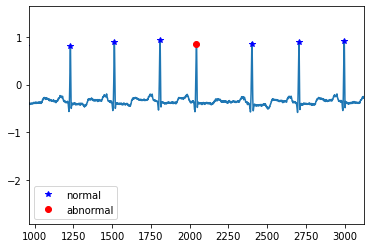

In [22]:
segment_len = 6
fs = 360

segment_start = ab_index[0] - int(segment_len/2*fs)
segment_end = ab_index[0] + int(segment_len/2*fs)

x = np.arange(len(p_signal))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(x, p_signal[:, 0])
plt.plot(x[nor_index], p_signal[nor_index, 0], 'b*', label='normal')
plt.plot(x[ab_index], p_signal[ab_index, 0], 'ro', label='abnormal')
plt.xlim(segment_start, segment_end)
plt.legend();

In [23]:
from urllib.parse import MAX_CACHE_SIZE
def make_dataset(pts, num_sec, fs, abnormal):

  # initialize numpy arrays
  num_cols = 2 * num_sec * fs
  X_all = np.zeros((1, num_cols))
  Y_all = np.zeros((1,1))
  sym_all = []

  # List to keep track of number of beats across patients
  max_rows = []
  for pt in pts:
    file = data_path + '/' + pt
    p_signal, atr_sym, atr_sample = load_ecg(file)

    # grab the first signal
    p_signal = p_signal[:,0]

    # make df to exclude the nonbreat
    df_ann = pd.DataFrame({'atr_sym':atr_sym, 'atr_sample':atr_sample})
    df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal +['N'])]

    X,Y,sym = build_XY(p_signal, df_ann, num_cols, abnormal)
    sym_all = sym_all + sym
    max_rows.append(X.shape[0])
    X_all = np.append(X_all,X, axis=0)
    Y_all = np.append(Y_all,Y, axis=0)

  #drop the first zeros rows
  X_all = X_all[1:,:]
  Y_all = Y_all[1:,:]

  #Check Size Make Sense
  assert np.sum(max_rows) == X_all.shape[0], 'number of X, max_rows row messed up'
  assert Y_all.shape[0] == X_all.shape[0], 'number of X, Y row messed up'
  assert Y_all.shape[0] == len(sym_all), 'number of Y, sym row messed up'
  return X_all, Y_all, sym_all

def build_XY(p_signal, df_ann, num_cols, abnormal):

  num_rows = len(df_ann)
  X = np.zeros((num_rows, num_cols))
  Y = np.zeros((num_rows,1))
  sym =[]

  #Keep track of rows
  max_row = 0
  for atr_sample, atr_sym in zip(df_ann.atr_sample.values, df_ann.atr_sym.values):
    left = max([0,(atr_sample - num_sec*fs)])
    right = min([len(p_signal),(atr_sample + num_sec*fs)])
    x = p_signal[left:right]
    if len(x) == num_cols:
      X[max_row,:] = x
      Y[max_row,:] = int(atr_sym in abnormal)
      sym.append(atr_sym)
      max_row +=1

  X = X[:max_row,:]
  Y = Y[:max_row,:]
  return X, Y, sym
      



In [24]:
num_sec = 3
fs =360
X_all, Y_all, sym_all = make_dataset(pts, num_sec, fs, abnormal)

print(X_all.shape)
print(Y_all.shape)
print(len(sym_all))



(94005, 2160)
(94005, 1)
94005


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.2, stratify = Y_all, random_state=12)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75204, 2160)
(75204, 1)
(18801, 2160)
(18801, 1)


In [26]:
sym, sym_count = np.unique(y_train, return_counts=True)
print(sym)
print(sym_count)

[0. 1.]
[59836 15368]


In [27]:
sym, sym_count = np.unique(y_test, return_counts=True)
print(sym)
print(sym_count)

[0. 1.]
[14959  3842]


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


In [29]:
models = Sequential()
models.add(Dense(32, activation='relu', input_shape=(2160,)))
models.add(Dropout(rate=0.25))
models.add(Dense(1, activation='sigmoid'))

In [30]:
models.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
models.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
2351/2351 [==============================] - 14s 5ms/step - loss: 0.2346 - accuracy: 0.9141
Epoch 2/5
2351/2351 [==============================] - 10s 4ms/step - loss: 0.1502 - accuracy: 0.9525
Epoch 3/5
2351/2351 [==============================] - 11s 5ms/step - loss: 0.1263 - accuracy: 0.9622
Epoch 4/5
2351/2351 [==============================] - 11s 5ms/step - loss: 0.1185 - accuracy: 0.9643
Epoch 5/5
2351/2351 [==============================] - 9s 4ms/step - loss: 0.1117 - accuracy: 0.9672


In [32]:
loss, acc = models.evaluate(X_test, y_test)

588/588 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9729


In [33]:
print(acc)

0.9728738069534302


In [34]:
import random

random.seed(42)
pts_train = random.sample(pts, 36)
pts_test = [pt for pt in pts if pt not in pts_train]
print(len(pts_train), len(pts_test))

36 12


In [35]:
from re import X
X_train, y_train, sym_train = make_dataset(pts_train, num_sec, fs, abnormal)
X_test, y_test, sym_test = make_dataset(pts_test, num_sec, fs, abnormal)

print(X_train.shape, y_train.shape, len(sym_train))
print(X_test.shape, y_test.shape, len(sym_test))


(70173, 2160) (70173, 1) 70173
(23832, 2160) (23832, 1) 23832


In [36]:
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_shape=(2160,)))
model1.add(Dropout(rate=0.25))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
2193/2193 [==============================] - 11s 5ms/step - loss: 0.2101 - accuracy: 0.9314
Epoch 2/5
2193/2193 [==============================] - 9s 4ms/step - loss: 0.1342 - accuracy: 0.9612
Epoch 3/5
2193/2193 [==============================] - 10s 5ms/step - loss: 0.1218 - accuracy: 0.9665
Epoch 4/5
2193/2193 [==============================] - 9s 4ms/step - loss: 0.1037 - accuracy: 0.9708
Epoch 5/5
2193/2193 [==============================] - 9s 4ms/step - loss: 0.1000 - accuracy: 0.9718


In [37]:
loss, acc = models.evaluate(X_test, y_test)

745/745 [==============================] - 2s 2ms/step - loss: 0.0814 - accuracy: 0.9735


In [38]:
print(acc)

0.9734810590744019


In [39]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

print(X_train_cnn.shape)
print(X_test_cnn.shape)

(70173, 2160, 1)
(23832, 2160, 1)


In [40]:
from keras.layers import Conv1D

model2 = Sequential()
model2.add(Conv1D(128, 5, padding='same', activation='relu', input_shape=(2160,1)))
model2.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train_cnn, y_train, batch_size=32, epochs=3, verbose=1)

Epoch 1/3
2193/2193 [==============================] - 622s 283ms/step - loss: 0.1814 - accuracy: 0.9428
Epoch 2/3
2193/2193 [==============================] - 574s 262ms/step - loss: 0.1129 - accuracy: 0.9685
Epoch 3/3
2193/2193 [==============================] - 579s 264ms/step - loss: 0.0944 - accuracy: 0.9730


In [41]:
loss, acc = model2.evaluate(X_test_cnn, y_test)


745/745 [==============================] - 26s 35ms/step - loss: 0.5247 - accuracy: 0.8055


In [42]:
print(acc)

0.805471658706665
